# Module 6: Autograded Assignment

### Outline:
**Here are the objectives of this assignment:**

1. Apply model selection techniques to various data sets.
2. Learn how to calculate and interpret different model selection criterion.
3. Prove to yourself that you have learned how to apply, interpret and optimize statistical models.
4. Apply variance inflation factors to analyze multicollinearity issues.

**Here are some general tips:**

1. Read the questions carefully to understand what is being asked.
2. When you feel that your work is completed, feel free to hit the ```Validate``` button to see your results on the *visible* unit tests. If you have questions about unit testing, please refer to the "Module 0: Introduction" notebook provided as an optional resource for this course. In this assignment, there are hidden unit tests that check your code. You will not recieve any feedback for failed hidden unit tests until the assignment is submitted. **Do not misinterpret the feedback from visible unit tests as all possible tests for a given question--write your code carefully!**
3. Before submitting, we recommend restarting the kernel and running all the cells in order that they appear to make sure that there are no additional bugs in your code.
4. There are 70 total points in this assignment.

In [1]:
# This cell loads the required packages
library(testthat)
library(tidyverse)
library(ggplot2)
library(leaps)
library(MASS)
library(regclass)
library(faraway)

Error in get(genname, envir = envir) : object 'testthat_print' not found


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::is_null() masks testthat::is_null()
✖ dplyr::lag()     masks stats::lag()
✖ dplyr::matches() masks tidyr::matches(), testthat::matches()


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: bestglm

Loading required package: VGAM

Loading required package: stats4

Loading required package: splines


Attaching package: ‘VGAM’


The following object is masked from ‘package:tidyr’:

    fill


Loading required package: rpart

Loading required package: randomForest

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomFor

# Problem 1: Model Selection Criterion

In this lesson, we will perform both the full and partial F-tests in R.

Recall again, the Amazon book data. The data consists of data on $n = 325$ books and includes measurements of:

- `aprice`: The price listed on Amazon (dollars)


- `lprice`: The book's list price (dollars)


- `weight`: The book's weight (ounces)


- `pages`: The number of pages in the book


- `height`: The book's height (inches)


- `width`: The book's width (inches)


- `thick`: The thickness of the book (inches)


- `cover`: Whether the book is a hard cover of paperback.


- And other variables...

Before we do any model selection, we'll repeat the data cleaning methods from the previous lesson on this dataset. For all tests in this lesson, let $\alpha = 0.05$.

In [2]:
amazon = read.csv("amazon.txt", sep="\t")
df = data.frame(aprice = amazon$Amazon.Price, lprice = as.numeric(amazon$List.Price),  
                pages = amazon$NumPages, width = amazon$Width, weight = amazon$Weight..oz,  
                height = amazon$Height, thick = amazon$Thick, cover = amazon$Hard..Paper)

df$lprice[which(is.na(df$lprice))] = mean(df$lprice, na.rm = TRUE)
df$weight[which(is.na(df$weight))] = mean(df$weight, na.rm = TRUE)
df$pages[which(is.na(df$pages))] = mean(df$pages, na.rm = TRUE)
df$height[which(is.na(df$height))] = mean(df$height, na.rm = TRUE)
df$width[which(is.na(df$width))] = mean(df$width, na.rm = TRUE)
df$thick[which(is.na(df$thick))] = mean(df$thick, na.rm = TRUE)
df = df[-205,]
summary(df)

     aprice            lprice           pages           width      
 Min.   :  0.770   Min.   :  1.50   Min.   : 24.0   Min.   :4.100  
 1st Qu.:  8.598   1st Qu.: 13.95   1st Qu.:208.0   1st Qu.:5.200  
 Median : 10.200   Median : 15.00   Median :320.0   Median :5.400  
 Mean   : 13.010   Mean   : 18.58   Mean   :335.8   Mean   :5.584  
 3rd Qu.: 13.033   3rd Qu.: 19.95   3rd Qu.:416.0   3rd Qu.:5.900  
 Max.   :139.950   Max.   :139.95   Max.   :896.0   Max.   :9.500  
     weight          height           thick       cover  
 Min.   : 1.20   Min.   : 5.100   Min.   :0.100   H: 89  
 1st Qu.: 7.80   1st Qu.: 7.900   1st Qu.:0.600   P:235  
 Median :11.20   Median : 8.100   Median :0.900          
 Mean   :12.48   Mean   : 8.161   Mean   :0.908          
 3rd Qu.:16.00   3rd Qu.: 8.500   3rd Qu.:1.100          
 Max.   :35.20   Max.   :12.100   Max.   :2.100          

### 1. (a) The Model (15 points)

We want to determine which predictors impact the Amazon list price. Begin by fitting the full model.

Fit a model named `lmod.full` to the data with `aprice` as the response and all other columns as predictors. Then calculate the AIC, BIC and adjusted $R^2$ for this model. Store these values in `AIC.full`, `BIC.full` and `adj.R2.full` respectively. 

In [4]:
AIC.full = NA
BIC.full = NA
adj.R2.full = NA

# your code here
lmod.full = lm(aprice~lprice+pages+width+weight+height+thick+cover,data=df)
n = dim(df)[1]
p = length(lmod.full$coefficient)-1
rss = sum(residuals(lmod.full)**2)

AIC.full = 2*(p+1)+n*log(rss/n)
BIC.full = (p+1)*log(n)+n*log(rss/n)
adj.R2.full = summary(lmod.full)$adj.r.squared

AIC.full
BIC.full
adj.R2.full

[1] 844.9804

[1] 875.2263

[1] 0.9144825

In [5]:
# Test Cell
# Check that the correct number of predictors were used in the model.
if(test_that("Check number of model parameters.", expect_equal(length(lmod.full$coefficients), 8))){
    print("Correct number of parameters in the model.")
}else{
    print("Make sure you're not using the Port column!")
}
# This cell has hidden test cases that will run after submission.

[1] "Correct number of parameters in the model."


In [6]:
# Test Cell
# This cell has hidden test cases that will run after submission.

In [7]:
# Test Cell
# This cell has hidden test cases that will run after submission.

### 1. (b) A Partial Model (15 points)

Fit a partial model to the data, with `aprice` as the response and `lprice`, and `pages` as predictors. Calculate the AIC, BIC and adjusted $R^2$ for this partial model. Store their values in `AIC.part`, `BIC.part` and `adj.R2.part` respectively.

In [8]:
AIC.part = NA
BIC.part = NA
adj.R2.part = NA

# your code here
lmod.part = lm(aprice~lprice+pages,data=df)
n = dim(df)[1]
p = length(lmod.part$coefficient)-1
rss = sum(residuals(lmod.part)**2)

AIC.part = 2*(p+1)+n*log(rss/n)
BIC.part = (p+1)*log(n)+n*log(rss/n)
adj.R2.part = summary(lmod.part)$adj.r.squared

AIC.part
BIC.part
adj.R2.part


[1] 863.7684

[1] 875.1106

[1] 0.9079922

In [9]:
# Test Cell
# This cell has hidden test cases that will run after submission.

In [10]:
# Test Cell
# This cell has hidden test cases that will run after submission.

In [11]:
# Test Cell
# This cell has hidden test cases that will run after submission.

### 1. (c) Model Selection (9 points)

Which model is better, `lmod.full` or `lmod.part` according to AIC, BIC, and $R^2_a$? Note that the answer may or may not be different across the different criteria. Save your selections as `selected.model.AIC`, `selected.model.BIC`, and `selected.model.adj.R2`.

In [12]:
selected.model.AIC = NA
selected.model.BIC = NA
selected.model.adj.R2 = NA
# your code here

selected.model.AIC = lmod.full
selected.model.BIC = lmod.part
selected.model.adj.R2 = lmod.full

In [13]:
# Test Cell
# This cell has hidden test cases that will run after submission.

In [14]:
# Test Cell
# This cell has hidden test cases that will run after submission.

In [15]:
# Test Cell
# This cell has hidden test cases that will run after submission.

### 1. (d) Model Validation (6 points)

Recall that a simpler model may perform statistically worse than a larger model. Test whether there is a statistically significant difference between `lmod.part` and `lmod.full`. Based on the result of this test, what model should you use? Save your answer as `validated.model`.

In [16]:
validated.model = NA

# your code here
summary(lmod.full)
summary(lmod.part)
validated.model = lmod.full
     



Call:
lm(formula = aprice ~ lprice + pages + width + weight + height + 
    thick + cover, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-20.3927  -1.8341  -0.3855   1.4233  22.2885 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.790394   2.483623  -0.721  0.47152    
lprice       0.854647   0.018251  46.828  < 2e-16 ***
pages       -0.001128   0.002471  -0.456  0.64840    
width        0.158748   0.307261   0.517  0.60576    
weight      -0.071535   0.048775  -1.467  0.14347    
height      -0.030707   0.285790  -0.107  0.91450    
thick       -1.677617   1.132703  -1.481  0.13958    
coverP       1.489428   0.569327   2.616  0.00932 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.639 on 316 degrees of freedom
Multiple R-squared:  0.9163,	Adjusted R-squared:  0.9145 
F-statistic: 494.4 on 7 and 316 DF,  p-value: < 2.2e-16



Call:
lm(formula = aprice ~ lprice + pages, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.0969  -1.8256  -0.0329   1.4436  23.3954 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.727973   0.516361  -1.410     0.16    
lprice       0.844690   0.015127  55.841  < 2e-16 ***
pages       -0.005824   0.001333  -4.369 1.69e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.775 on 321 degrees of freedom
Multiple R-squared:  0.9086,	Adjusted R-squared:  0.908 
F-statistic:  1595 on 2 and 321 DF,  p-value: < 2.2e-16


In [17]:
# Test Cell
# This cell has hidden test cases that will run after submission.

## Problem 2

`divorce` is a data frame with 77 observations on the following 7 variables.

1. `year`: the year from 1920-1996

2. `divorce`: divorce per 1000 women aged 15 or more 

3. `unemployed` unemployment rate 

4. `femlab`: percent female participation in labor force aged 16+

5. `marriage`: marriages per 1000 unmarried women aged 16+ 

6. `birth`: births per 1000 women aged 15-44 

7. `military`: military personnel per 1000 population

Here's the data:

In [33]:
# Load in the data
divorce = read.csv("divusa.txt", sep="\t")
summary(divorce)
head(divorce)

      year         divorce        unemployed         femlab     
 Min.   :1920   Min.   : 6.10   Min.   : 1.200   Min.   :22.70  
 1st Qu.:1939   1st Qu.: 8.70   1st Qu.: 4.200   1st Qu.:27.47  
 Median :1958   Median :10.60   Median : 5.600   Median :37.10  
 Mean   :1958   Mean   :13.27   Mean   : 7.173   Mean   :38.58  
 3rd Qu.:1977   3rd Qu.:20.30   3rd Qu.: 7.500   3rd Qu.:47.80  
 Max.   :1996   Max.   :22.80   Max.   :24.900   Max.   :59.30  
    marriage          birth           military     
 Min.   : 49.70   Min.   : 65.30   Min.   : 1.940  
 1st Qu.: 61.90   1st Qu.: 68.90   1st Qu.: 3.469  
 Median : 74.10   Median : 85.90   Median : 9.102  
 Mean   : 72.97   Mean   : 88.89   Mean   :12.365  
 3rd Qu.: 80.00   3rd Qu.:107.30   3rd Qu.:14.266  
 Max.   :118.10   Max.   :122.90   Max.   :86.641  

,year,divorce,unemployed,femlab,marriage,birth,military
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1920,8.0,5.2,22.70,92.0,117.9,3.2247
2,1921,7.2,11.7,22.79,83.0,119.8,3.5614
3,1922,6.6,6.7,22.88,79.7,111.2,2.4553
4,1923,7.1,2.4,22.97,85.2,110.5,2.2065
5,1924,7.2,5.0,23.06,80.3,110.9,2.2889
6,1925,7.2,3.2,23.15,79.2,106.6,2.1735


### 2 (a) (10 points) 

Using the `divorce` data, with `divorce` as the response and all other variables as predictors, select the "best" regression model, where "best" is defined using AIC. Save your final model as `lm_divorce`.**

Warning message in numOfParam1:numOfParam2:
“numerical expression has 12 elements: only the first used”


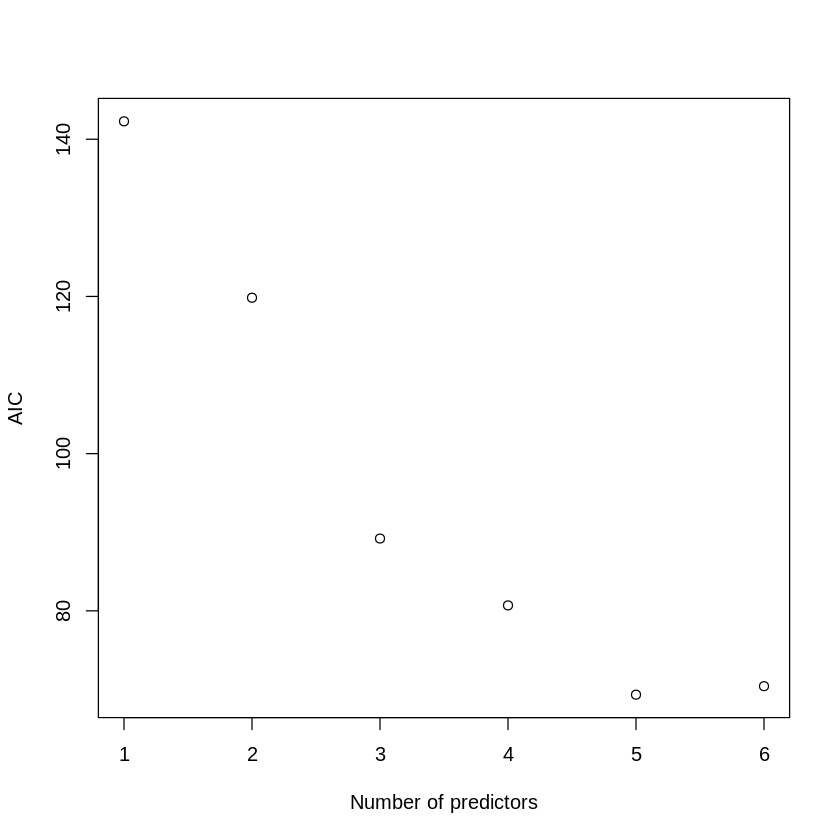

In [71]:
# lm_divorce = NA

# # your code here
# library(leaps)
# n2a = dim(divorce)[1]
# reg2a = regsubsets(divorce~unemployed+femlab+marriage+birth+military+year,data=divorce,nvmax=6)
# rs2a = summary(reg2a)
# rs2a = which , 1))
# numOfParam2=rowSums(tail(rs2a$which,1))
# numOfParam1
# numOfParam2

# AIC = 2*(numOfParam1:numOfParam2) + n2a*log(rs2a$rss/n2a)
# plot(AIC ~ I(1:6), xlab='Number of predictors', ylab='AIC')

# lm_divorce = lm(divorce~year+femlab+marriage+birth+military,data=divorce)


library(leaps)

n2a <- dim(divorce)[1]
reg2a <- regsubsets(divorce ~ unemployed + femlab + marriage + birth + military + year, data = divorce, nvmax = 6)
rs2a <- summary(reg2a)
numOfParam1 <- tail(which(rs2a$which, 1))
numOfParam2 <- rowSums(tail(rs2a$which, 1))
AIC <- 2 * (numOfParam1:numOfParam2) + n2a * log(rs2a$rss / n2a)
plot(AIC ~ I(1:6), xlab = 'Number of predictors', ylab = 'AIC')

lm_divorce <- lm(divorce ~ year + femlab + marriage + birth + military, data = divorce)


In [20]:
# Test Cell
# This cell has hidden test cases that will run after submission.

### 2 (b) (10 points) 

Using your model from part (a), compute the variance inflation factors VIFs for each $\widehat\beta_j$, $j = 1,...,p$. Store them in the variable `v`. Also, compute the condition number for the design matrix, stored in `k`. If using the `kappa()` function, you might need to specify `exact = TRUE`. Is there evidence that collinearity causes some predictors not to be significant?

In [72]:
# your code here
X = model.matrix(lm_divorce)
v = vif(lm_divorce)
k = kappa(
    lm_divorce,
    exact=TRUE
)

v
k

year    femlab  marriage     birth  military 
42.948267 48.650935  2.624531  2.031677  1.358002

[1] 1083823

In [73]:
# Test Cell
# This cell has hidden test cases that will run after submission.

### 2. (c) (5 points) 

Remove the predictor with the highest VIF. Is multicollinearity still present in the model? If yes, store `TRUE` in `prob.2.c`, and `FALSE` otherwise.

In [74]:
prob.2.c = NA

# your code here
lm_divorce.reduce = lm(divorce~marriage+birth+military+year,data=divorce)
X = model.matrix(lm_divorce.reduce)

vif(lm_divorce.reduce)
kappa(lm_divorce.reduce,exact=TRUE)

prob.2.c = TRUE

marriage    birth military     year 
2.331921 1.982541 1.125807 1.833706

[1] 244324

In [34]:
# Test Cell
# This cell has hidden test cases that will run after submission.